In [ ]:
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [ ]:
LOCAL_DIR = os.path.join("data", "housing")
LOCAL_FILE = os.path.join(LOCAL_DIR,'housing.csv')

In [ ]:
df = pd.read_csv(LOCAL_FILE)

In [ ]:
df.info()

In [ ]:
df = df[df["ocean_proximity"] != 'ISLAND']

In [ ]:
df["ocean_proximity"].value_counts()

In [ ]:
#One Hot Encoding
df = pd.get_dummies(df)

In [ ]:
df.head()

### Three ways to Deal with Missing Values
#### 1. Drop the rows containing missing values
#### 2. Drop the whole column that has missing values
#### 3. For Numerical columns, Impute (estimate) the values with mean, median or some other statistic of the column

In [ ]:

#df.dropna(subset=["total_bedrooms"]) # option 1

#df.drop("total_bedrooms", axis=1) # option 2

#median = df["total_bedrooms"].median()
#df["total_bedrooms"].fillna(median) # option 3

In [ ]:
imputer = Imputer(strategy="median")

In [ ]:
imputed = imputer.fit_transform(df)

In [ ]:
df = pd.DataFrame(imputed,columns=df.columns)

In [ ]:
df.head()

In [ ]:
df.info()

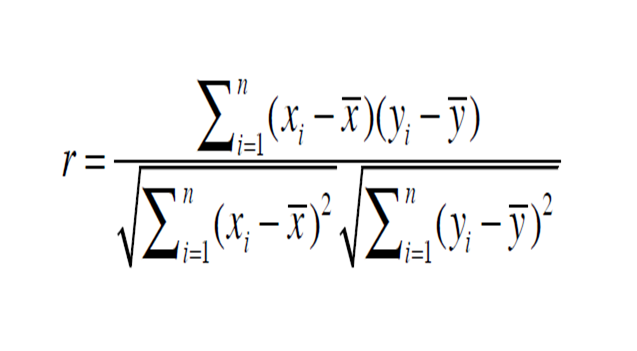

In [ ]:
corr_matrix = df.corr()

In [ ]:
print(corr_matrix)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
df['median_income'].hist()

In [ ]:
buckets = np.linspace(0,16,6)
df['median_income_cats'] = pd.cut(df['median_income'], buckets)

In [ ]:
df['median_income_cats'].value_counts()

In [ ]:
df['median_income_cats'].value_counts()/len(df)

In [ ]:
X_train,X_test = train_test_split(df,test_size=0.2,stratify= df['median_income_cats'],
                                  shuffle = True,random_state=144)

In [ ]:
X_train['median_income_cats'].value_counts()/len(X_train)

In [ ]:
X_test['median_income_cats'].value_counts()/len(X_test)

In [ ]:
X_train.head()

In [ ]:
X_train,X_valid = train_test_split(X_train,test_size=0.15,
                                  stratify= X_train['median_income_cats'],
                                  shuffle = True,random_state=144)

In [ ]:
X_train['median_income_cats'].value_counts()/len(X_train)

In [ ]:
X_valid['median_income_cats'].value_counts()/len(X_valid)

In [ ]:
X_train.shape,X_valid.shape,X_test.shape

In [ ]:
y_train = X_train['median_house_value'].copy()
y_valid = X_valid['median_house_value'].copy()
y_test = X_test['median_house_value'].copy()

In [ ]:
y_train.shape,y_valid.shape,y_test.shape

In [ ]:
X_train.drop('median_house_value',axis=1,inplace=True)
X_valid.drop('median_house_value',axis=1,inplace=True)
X_test.drop('median_house_value',axis=1,inplace=True)

In [ ]:
X_train.shape,X_valid.shape,X_test.shape

In [ ]:
X_train.drop('median_income_cats',axis=1,inplace=True)
X_valid.drop('median_income_cats',axis=1,inplace=True)
X_test.drop('median_income_cats',axis=1,inplace=True)

In [ ]:
X_train.shape,X_valid.shape,X_test.shape

In [ ]:
y_train.shape,y_valid.shape,y_test.shape

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
y_valid.head()

In [ ]:
y_test.head()